# HR-аналитика: предсказание уровня удовлетворенности сотрудников и их увольнения по собственному желанию

>[HR-аналитика: предсказание уровня удовлетворенности сотрудников и их увольнения по собственному желанию](#scrollTo=xs0uImj9Ki1A)

>>>[Описание проекта](#scrollTo=NYBjPInBKtFg)

>>>[Описание данных](#scrollTo=BE93G3OKK33P)

>>>[Импорт библиотек](#scrollTo=DNDBHJj8LOyY)

>>[Задача 1: предсказание уровня удовлетворенности сотрудника](#scrollTo=xE7vKMZEK9QW)

>>>[Шаг 1.1. Загрузка данных](#scrollTo=9f11398d)

>>>[Шаг 1.2. Предобработка данных](#scrollTo=xQzSohmWL9yv)

>>>[Шаг 1.3. Исследовательский анализ данных](#scrollTo=1fe1937e)

>>>>[1.3.1. Количественные признаки](#scrollTo=a3eb1dc4)

>>>>[1.3.2. Категориальные признаки](#scrollTo=45140868)

>>>>[1.3.3. Корреляционный анализ](#scrollTo=2f928102)

>>>>[1.3.4. Мультиколлинеарность](#scrollTo=a49eaf7e)

>>>[Шаг 1.4. Подготовка данных](#scrollTo=e7eb32d6)

>>>[Шаг 1.5. Обучение моделей](#scrollTo=25467051)

>>>[Вывод по задаче 1](#scrollTo=48767d50)

>>[Задача 2: предсказание увольнения сотрудника из компании](#scrollTo=3ae2ebe0)

>>>[Шаг 2.1. Загрузка данных](#scrollTo=LdR-xw_QOPVd)

>>>[Шаг 2.2. Предобработка данных](#scrollTo=5080ecfc)

>>>[Шаг 2.3. Исследовательский анализ данных](#scrollTo=48e301b0)

>>>>[2.3.1. Количественные признаки](#scrollTo=2bNUXLX7OhWU)

>>>>[2.3.2. Качественные признаки](#scrollTo=3d31c118)

>>>>[2.3.3. Корреляционный анализ](#scrollTo=97e01ca7)

>>>>[2.3.4. Портрет типичного уволившегося сотрудника](#scrollTo=b77638dc)

>>>>[2.3.5. Проверка влияния удовлетворенности на увольнение](#scrollTo=9b597014)

>>>[Шаг 2.4. Добавление нового входного признака](#scrollTo=ee07ebb1)

>>>[Шаг 2.5. Подготовка данных](#scrollTo=6ec50b28)

>>>[Шаг 2.6. Обучение моделей](#scrollTo=efbe69f9)

>>>[Вывод по задаче 2](#scrollTo=e545a61a)

>>[Общий вывод](#scrollTo=b58a939c)



### Описание проекта

Проект выполняется для компании, желающей оптимизировать управление персоналом. Руководство ожидает получить рекомендации, как избежать финансовых потерь из-за оттока сотрудников.

Компания предоставила данные с характеристиками сотрудников, в том числе с уровнем удовлетворенности сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворенности от 0 до 1, где 0 — совершенно неудовлетворен, 1 — полностью удовлетворен.

Нужно построить две модели:
1. Для предсказания уровня удовлетворенности сотрудника;
2. Для предсказания увольнения сотрудника по собственному желанию.

### Описание данных

Данные изначально разделены на тренировочную и тестовую выборки, в тестовой входные признаки отделены от целевых.
Файлы с данными:
* `train_job_satisfaction_rate.csv` (тренировочная выборка для первой модели);
* `test_features.csv` (входные признаки тестовой выборки);
* `test_target_job_satisfaction_rate.csv` (целевой признак тестовой выборки для первой модели);
* `train_quit.csv` (тренировочная выборка для второй модели);
* `test_target_quit.csv` (целевой признак тестовой выборки для второй модели).

Признаки, встречающиеся в предоставленных данных

|название столбца|содержащиеся данные|
|:-|:-|
|`id`|уникальный идентификатор сотрудника|
|`dept`|отдел, в котором работает сотрудник|
|`level`|уровень занимаемой должности|
|`workload`|уровень загруженности сотрудника|
|`employment_years`|длительность работы в компании (в годах)|
|`last_year_promo`|было ли повышение за последний год|
|`last_year_violations`|нарушал ли сотрудник трудовой договор за последний год|
|`supervisor_evaluation`|оценка качества работы сотрудника, которую дал руководитель|
|`salary`|ежемесячная зарплата сотрудника|
|`job_satisfaction_rate`|уровень удовлетворенности сотрудника работой в компании|
|`quit`|увольнение сотрудника из компании|

### Импорт библиотек

In [ ]:
! pip install shap
! pip install phik

In [ ]:
!pip install -U scikit-learn

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: None
Author-email: None
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distribution.
        
        * Neither the name of the copyright holder nor the names of its
          contributors may be used to endorse or promo

In [ ]:
import pandas as pd
import numpy as np
import phik
import sklearn
import shap

import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.svm import (
    SVR,
    SVC
)

from sklearn.tree import (
    DecisionTreeRegressor,
    DecisionTreeClassifier,
    plot_tree
)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score

RANDOM_STATE = 42

In [ ]:
def show_num(data, col):
    """
    Принимает:
        наименование переменной, хранящей датафрейм;
        наименование столбца с количественными данными в этом датафрейме.
    Возвращает:
        общее описание данных;
        гистограмму с наложенным графиком плотности распределения;
        диаграмму размаха.
    """
    figure, axs = plt.subplots(1, 2, figsize=(15, 8))
    figure.suptitle(col.title())

    sns.histplot(data[col], bins=50, kde=True, ax=axs[0])
    axs[0].set_title('Гистограмма и плотность расределения')

    sns.boxplot(data=data[col], ax=axs[1])
    axs[1].set_title('Диаграмма размаха')

    plt.show()

    display(data[col].describe().to_frame())

def show_cat(data, col):
    """
    Принимает:
        наименование переменной, хранящей датафрейм;
        наименование столбца с категориальными данными в этом датафрейме.
    Возвращает:
        столбчатую диаграмму;
        абсолютное количество и долю для каждого уникального значения.
    """
    sns.countplot(
        x=data[col],
        palette='blend:#a27ade,#63cfb0'
    )
    plt.title(f'{col}: столбчатая диаграмма')
    plt.xticks(rotation=90)
    plt.show()

    frame = data[col].value_counts().to_frame()
    frame['proportion'] = round((frame[col] / data.shape[0]), 2)
    display(frame.sort_values(by='proportion', ascending=False))


## Задача 1: предсказание уровня удовлетворенности сотрудника

Это задача регрессии. Для ее решения могут подойти линейная регрессия, SVR, регрессия дерева решений.

Но сначала необходимо познакомиться с имеющимися признаками.

### Шаг 1.1. Загрузка данных


In [ ]:
try:
    train_1 = pd.read_csv('/content/drive/MyDrive/datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('/content/drive/MyDrive/datasets/test_features.csv')
    y_test_1 = pd.read_csv('/content/drive/MyDrive/datasets/test_target_job_satisfaction_rate.csv')
except:
    train_1 = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('/datasets/test_features.csv')
    y_test_1 = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

dataframes = [train_1, X_test, y_test_1]

for dataframe in dataframes:
    print(dataframe.info())
    display(dataframe.head())
    print()
    print()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


**Промежуточные выводы**

Все предоставленные данные сохранили в переменных, информация считывается корректно.

В данных есть очень маленькое количество случайных пропусков в столбцах `dept` и `level`. Заполним их на этапе предобработки.

Все типы данных соответствуют ожиданиям.




### Шаг 1.2. Предобработка данных

Проверим наличие явных дубликатов в тренировочной выборке. Нас интересуют повторения в столбце `id`.

А также неявные дубликаты в обеих выборках во всех столбцах с типом данных `object`.

In [ ]:
print('Явные дубликаты:')
for dataframe in dataframes:
    print(dataframe['id'].duplicated().sum())

print('Проверка скрытых дубликатов')
cat_columns = train_1.select_dtypes(include='object').columns.to_list()
for col in cat_columns:
    print('В тренировочной выборке')
    print(train_1[col].value_counts())
    print()
    print('В тестовой выборке')
    print(X_test[col].value_counts())
    print()

Явные дубликаты:
0
0
0
Проверка скрытых дубликатов
В тренировочной выборке
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

В тестовой выборке
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

В тренировочной выборке
junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

В тестовой выборке
junior    974
middle    854
sinior    171
Name: level, dtype: int64

В тренировочной выборке
medium    2066
low       1200
high       734
Name: workload, dtype: int64

В тестовой выборке
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

В тренировочной выборке
no     3880
yes     120
Name: last_year_promo, dtype: int64

В тестовой выборке
no     1937
yes      63
Name: last_year_promo, dtype: int64

В тренировочной выборке
no     3441
yes     559
Name: last_year_violations, dtype: int64

В те

Ни явных, ни скрытых дубликатов нет. Возможные значения всех категориальных признаков совпадают в тренировочной и тестовой выборках.

Есть опечатки в столбце `level`. Исправим их в пайплайне вместе с обработкой пропусков. Пропусков в количественных признаках нет, но они могут появиться в будущем, предусмотрим их заполнение медианой. Пропуски в категориальных признаках заполним модой.

In [ ]:
num_columns_for_imput = ['employment_years', 'supervisor_evaluation', 'salary']

num_imputer_nan = SimpleImputer(missing_values=np.nan, strategy='median')
cat_imputer_nan = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat_imputer_space = SimpleImputer(missing_values=' ', strategy='most_frequent')
cat_imputer_sinior = SimpleImputer(missing_values='sinior', strategy='constant', fill_value='senior')

pipe_impute_nan = Pipeline(
    [('impute_num', num_imputer_nan),
    ('impute_cat', cat_imputer_nan)]
)

data_imputer_nan = ColumnTransformer(
    [('num', pipe_impute_nan['impute_num'], num_columns_for_imput),
     ('cat', pipe_impute_nan['impute_cat'], cat_columns)],
    remainder='passthrough'
)

train_1_imp_nan = pd.DataFrame(
    data_imputer_nan.fit_transform(train_1[num_columns_for_imput+cat_columns]),
    columns=num_columns_for_imput+cat_columns
)

train_1_imp_space = pd.DataFrame(
    cat_imputer_space.fit_transform(train_1_imp_nan),
    columns=num_columns_for_imput+cat_columns
)

train_1_imp = pd.DataFrame(
    cat_imputer_sinior.fit_transform(train_1_imp_space),
    columns=num_columns_for_imput+cat_columns
)

train_1_imputed = train_1[['id', 'job_satisfaction_rate']].join(train_1_imp)

print(train_1_imputed.info())
display(train_1_imputed.head())
print(train_1_imputed['level'].unique())
print(train_1_imputed['workload'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   job_satisfaction_rate  4000 non-null   float64
 2   employment_years       4000 non-null   object 
 3   supervisor_evaluation  4000 non-null   object 
 4   salary                 4000 non-null   object 
 5   dept                   4000 non-null   object 
 6   level                  4000 non-null   object 
 7   workload               4000 non-null   object 
 8   last_year_promo        4000 non-null   object 
 9   last_year_violations   4000 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 312.6+ KB
None


,id,job_satisfaction_rate,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations
0,155278,0.58,2.0,1.0,24000.0,sales,junior,medium,no,no
1,653870,0.76,2.0,5.0,38400.0,hr,junior,high,no,no
2,184592,0.11,1.0,2.0,12000.0,sales,junior,low,no,no
3,171431,0.37,4.0,2.0,18000.0,technology,junior,low,no,no
4,693419,0.20,1.0,3.0,22800.0,hr,junior,medium,no,no


['junior' 'middle' 'senior']
['medium' 'high' 'low']


In [ ]:
X_test_imp_nan = pd.DataFrame(
    data_imputer_nan.transform(X_test[num_columns_for_imput+cat_columns]),
    columns=num_columns_for_imput+cat_columns
)

X_test_imp_space = pd.DataFrame(
    cat_imputer_space.transform(X_test_imp_nan),
    columns=num_columns_for_imput+cat_columns
)

X_test_imputed = pd.DataFrame(
    cat_imputer_sinior.transform(X_test_imp_space),
    columns=num_columns_for_imput+cat_columns
)

X_test_imputed['id'] = X_test['id']

print(X_test_imputed.info())
display(X_test_imputed.head())
print(X_test_imputed['level'].unique())
print(X_test_imputed['workload'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employment_years       2000 non-null   object
 1   supervisor_evaluation  2000 non-null   object
 2   salary                 2000 non-null   object
 3   dept                   2000 non-null   object
 4   level                  2000 non-null   object
 5   workload               2000 non-null   object
 6   last_year_promo        2000 non-null   object
 7   last_year_violations   2000 non-null   object
 8   id                     2000 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 140.8+ KB
None


,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations,id
0,2.0,5.0,28800.0,marketing,junior,medium,no,no,485046
1,1.0,4.0,30000.0,hr,junior,medium,no,no,686555
2,5.0,4.0,19200.0,sales,middle,low,no,no,467458
3,6.0,4.0,19200.0,sales,middle,low,no,no,418655
4,5.0,5.0,40800.0,hr,middle,medium,no,no,789145


['junior' 'middle' 'senior']
['medium' 'low' 'high']


Заполнены пропуски в виде `nan` и в виде пробелов в тренировочной выборке и во входных признаках тестовой выборки.

Теперь необходимо вернуть числовые данные к правильным типам.

In [ ]:
train_1_imputed['id'] = train_1_imputed['id'].astype('int32')
train_1_imputed['employment_years'] = train_1_imputed['employment_years'].astype('int32')
train_1_imputed['salary'] = train_1_imputed['salary'].astype('int32')

train_1_imputed['job_satisfaction_rate'] = train_1_imputed['job_satisfaction_rate'].astype('float32')

print('Тренировочная выборка')
print(train_1_imputed.info())
display(train_1_imputed.head())

X_test_imputed['id'] = X_test_imputed['id'].astype('int32')
X_test_imputed['employment_years'] = X_test_imputed['employment_years'].astype('int32')
X_test_imputed['salary'] = X_test_imputed['salary'].astype('int32')

print('Входные признаки тестовой выборки')
print(X_test_imputed.info())
display(X_test_imputed.head())


Тренировочная выборка
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int32  
 1   job_satisfaction_rate  4000 non-null   float32
 2   employment_years       4000 non-null   int32  
 3   supervisor_evaluation  4000 non-null   object 
 4   salary                 4000 non-null   int32  
 5   dept                   4000 non-null   object 
 6   level                  4000 non-null   object 
 7   workload               4000 non-null   object 
 8   last_year_promo        4000 non-null   object 
 9   last_year_violations   4000 non-null   object 
dtypes: float32(1), int32(3), object(6)
memory usage: 250.1+ KB
None


,id,job_satisfaction_rate,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations
0,155278,0.58,2,1.0,24000,sales,junior,medium,no,no
1,653870,0.76,2,5.0,38400,hr,junior,high,no,no
2,184592,0.11,1,2.0,12000,sales,junior,low,no,no
3,171431,0.37,4,2.0,18000,technology,junior,low,no,no
4,693419,0.20,1,3.0,22800,hr,junior,medium,no,no


Входные признаки тестовой выборки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employment_years       2000 non-null   int32 
 1   supervisor_evaluation  2000 non-null   object
 2   salary                 2000 non-null   int32 
 3   dept                   2000 non-null   object
 4   level                  2000 non-null   object
 5   workload               2000 non-null   object
 6   last_year_promo        2000 non-null   object
 7   last_year_violations   2000 non-null   object
 8   id                     2000 non-null   int32 
dtypes: int32(3), object(6)
memory usage: 117.3+ KB
None


,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations,id
0,2,5.0,28800,marketing,junior,medium,no,no,485046
1,1,4.0,30000,hr,junior,medium,no,no,686555
2,5,4.0,19200,sales,middle,low,no,no,467458
3,6,4.0,19200,sales,middle,low,no,no,418655
4,5,5.0,40800,hr,middle,medium,no,no,789145


**Промежуточные выоды**

Проверили наличие явных и скрытых дубликатов. Не обнаружили.

Построили пайплайн для заполнения пропусков. Заполнили пропуски в категориальных признаках модой. После заполнения пропусков преобразовали типы данных для числовых признаков.


### Шаг 1.3. Исследовательский анализ данных

Исследуем данные в тренировочной и тестовой выборке (чтобы проверить, нет ли между выборками значимых отличий), количественные отдельно от категориальных; изучим взаимосвязи и устраним мультиколлинеарность входных признаков, если она есть.


#### 1.3.1. Количественные признаки

Рассмотрим данные в столбцах:
* `employment_years` (дискретный признак с небольшим количеством уникальных значений, поэтому для его визуализации используем функцию `show_cat`);
* `salary`;
* `job_satisfaction_rate`.

Тренировочная выборка


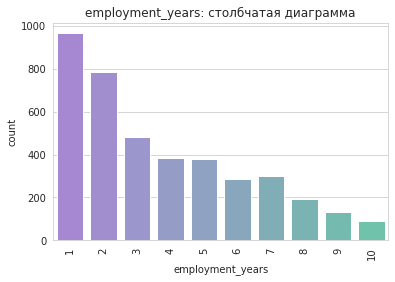

,employment_years,proportion
1,966,0.24
2,785,0.20
3,483,0.12
4,384,0.10
5,380,0.10
7,301,0.08
6,287,0.07
8,193,0.05
9,130,0.03
10,91,0.02


Тестовая выборка


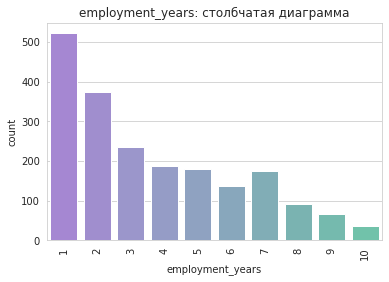

,employment_years,proportion
1,522,0.26
2,374,0.19
3,234,0.12
4,187,0.09
5,179,0.09
7,174,0.09
6,138,0.07
8,91,0.05
9,66,0.03
10,35,0.02


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'employment_years')

print('Тестовая выборка')
show_cat(X_test_imputed, 'employment_years')

Нет аномалий и выбросов. Выборки похожи.

Больше всего сотрудников, работающих 1 год. Это минимальное значение. Медиана меньше среднего и равна 3. Максимальное число лет - 10.

Распределение похоже на распределение Пуассона: на каждом следующем году работы сотрудников становится меньше.

Тренировочная выборка


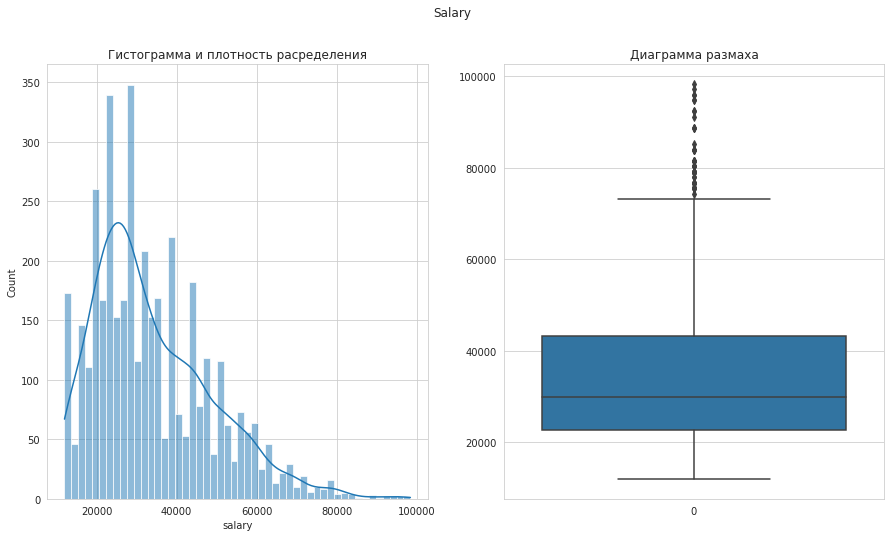

,salary
count,4000.000000
mean,33926.700000
std,14900.703838
min,12000.000000
25%,22800.000000
50%,30000.000000
75%,43200.000000
max,98400.000000


Тестовая выборка


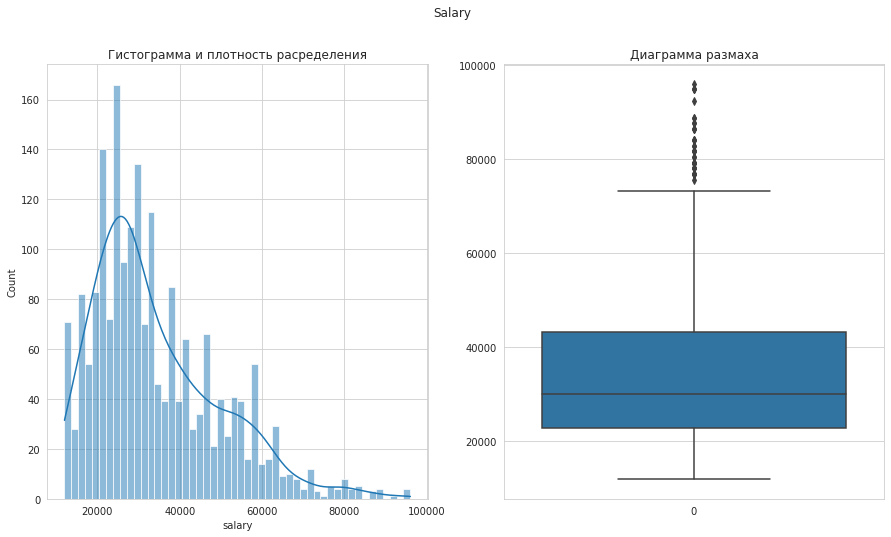

,salary
count,2000.000000
mean,34066.800000
std,15398.436729
min,12000.000000
25%,22800.000000
50%,30000.000000
75%,43200.000000
max,96000.000000


In [ ]:
print('Тренировочная выборка')
show_num(train_1_imputed, 'salary')

print('Тестовая выборка')
show_num(X_test_imputed, 'salary')

Нет аномалий, есть выбросы в верхней части диаграммы размаха. Выборки похожи.

Минимальная заработная плата 12 тысяч. Медиана меньше среднего и равна 30 тысячам. Большинство сотрудников зарабатывает от 22 800 до 43 200, при этом максимальная плата - 98 400.

Распределение похоже на распределение Пуассона: линия плотности распределения идет резко вверх примерно до 30 тысяч, а затем плавно.

Тренировочная выборка


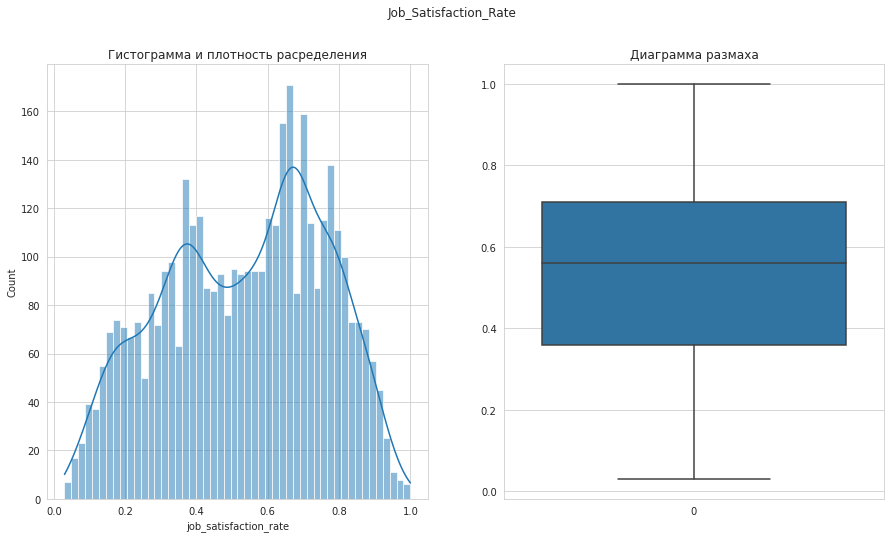

,job_satisfaction_rate
count,4000.000000
mean,0.533995
std,0.225327
min,0.030000
25%,0.360000
50%,0.560000
75%,0.710000
max,1.000000


Тестовая выборка


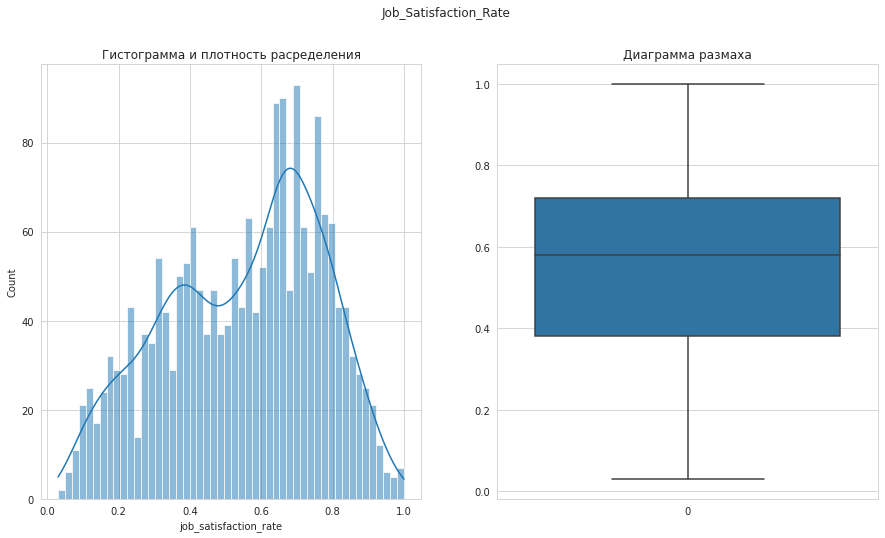

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


In [ ]:
print('Тренировочная выборка')
show_num(train_1_imputed, 'job_satisfaction_rate')

print('Тестовая выборка')
show_num(y_test_1, 'job_satisfaction_rate')

Нет аномалий и выбросов. Выборки похожи.

Большинство сотрудников удовлетворено своей работой на 0.38-0.72.

Распределение похоже на нормальное биномиальное с вершинами около 0.4 и 0.67 (правый пик заметно выше). Медиана близка к среднему, немного больше 0.5. На диаграмме размаха видно, что нижняя часть "перевешивает" верхнюю, то есть сотрудников, испытывающих слабое удовлетворение, ощутимо больше.

#### 1.3.2. Категориальные признаки

Рассмотрим данные в столбцах:
* `supervisor_evaluation`;
* `dept`;
* `level`;
* `workload`;
* `last_year_promo`;
* `last_year_violations`.

Тренировочная выборка


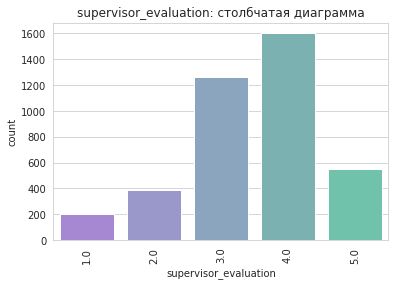

,supervisor_evaluation,proportion
4.0,1603,0.40
3.0,1263,0.32
5.0,546,0.14
2.0,387,0.10
1.0,201,0.05


Тестовая выборка


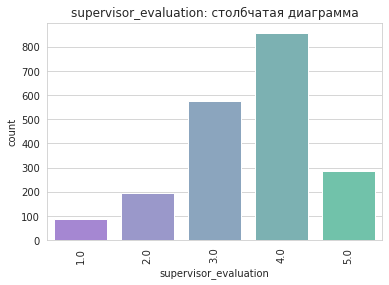

,supervisor_evaluation,proportion
4.0,857,0.43
3.0,575,0.29
5.0,284,0.14
2.0,196,0.10
1.0,88,0.04


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'supervisor_evaluation')

print('Тестовая выборка')
show_cat(X_test_imputed, 'supervisor_evaluation')

Выборки похожи по распределению оценок.

Самые частые оценки: 3 и 4. Самая редкая оценка 1.

Тренировочная выборка


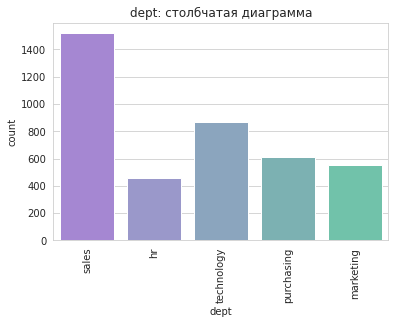

,dept,proportion
sales,1518,0.38
technology,866,0.22
purchasing,610,0.15
marketing,550,0.14
hr,456,0.11


Тестовая выборка


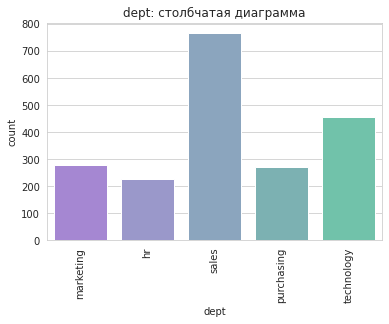

,dept,proportion
sales,766,0.38
technology,455,0.23
marketing,279,0.14
purchasing,273,0.14
hr,227,0.11


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'dept')

print('Тестовая выборка')
show_cat(X_test_imputed, 'dept')

Соотношения сотрудников из разных отделов в выборках похожи. С большим отрывом количественное преимущество за отделом продаж, второй по численности - отдел технологии, а самый малочисленный - отдел hr.

Тренировочная выборка


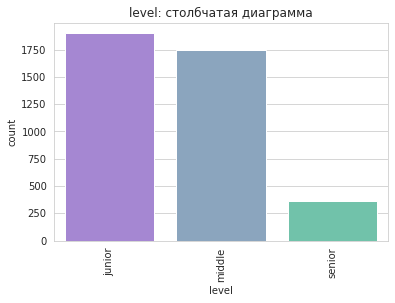

,level,proportion
junior,1898,0.47
middle,1744,0.44
senior,358,0.09


Тестовая выборка


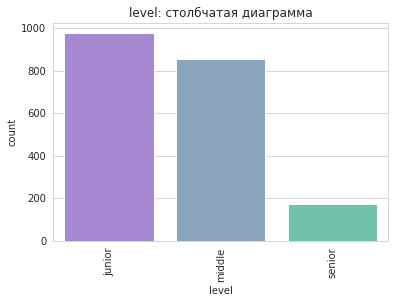

,level,proportion
junior,975,0.49
middle,854,0.43
senior,171,0.09


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'level')

print('Тестовая выборка')
show_cat(X_test_imputed, 'level')

Выборки похожи.

Очень мало сотрудников уровня `senior`, число `junior` и `middle` отличается не так сильно.

Тренировочная выборка


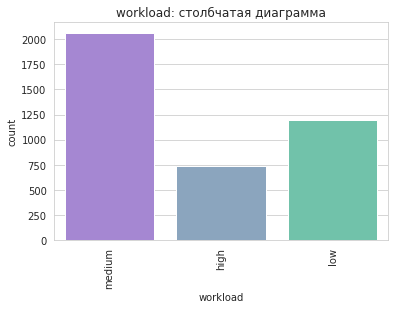

,workload,proportion
medium,2066,0.52
low,1200,0.30
high,734,0.18


Тестовая выборка


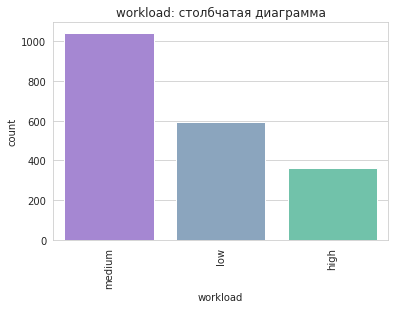

,workload,proportion
medium,1044,0.52
low,593,0.30
high,363,0.18


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'workload')

print('Тестовая выборка')
show_cat(X_test_imputed, 'workload')

По уровню загруженности выборки похожи.

Большинство сотрудников загружено средне. Наименьшее количество сотрудников с высокой загруженностью.

Тренировочная выборка


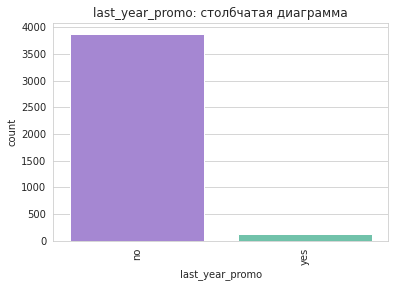

,last_year_promo,proportion
no,3880,0.97
yes,120,0.03


Тестовая выборка


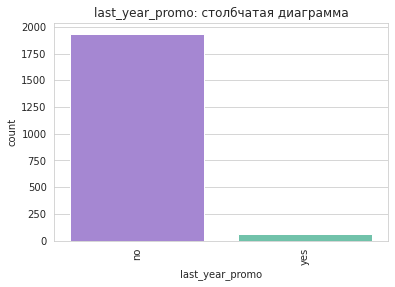

,last_year_promo,proportion
no,1937,0.97
yes,63,0.03


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'last_year_promo')

print('Тестовая выборка')
show_cat(X_test_imputed, 'last_year_promo')

Выборки похожи.

Только 3% сотрудников получили повышение в прошлом году.

Тренировочная выборка


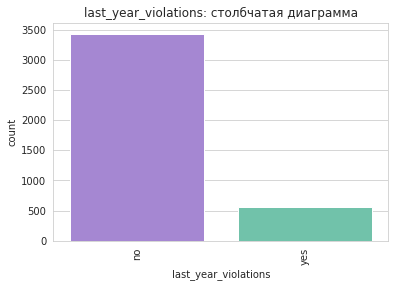

,last_year_violations,proportion
no,3441,0.86
yes,559,0.14


Тестовая выборка


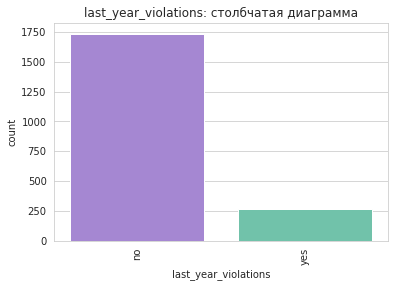

,last_year_violations,proportion
no,1738,0.87
yes,262,0.13


In [ ]:
print('Тренировочная выборка')
show_cat(train_1_imputed, 'last_year_violations')

print('Тестовая выборка')
show_cat(X_test_imputed, 'last_year_violations')

Выборки похожи.

Примерно 13-14% сотрудников нарушали трудовой договор в прошлом году.

**Промежуточные выводы**

1. В данных нет аномалий, крайне мало выбросов.

2. Тренировочная и тестовая выборки не имеют значительных отличий.

3. Большинство сотрудников:
* работает меньше 5 лет;
* зарабатывает от 22 800 до 43 200;
* не очень удовлетворено своей работой;
* оценивается начальниками на 4 или 3 из 5;
* работает в отделе продаж;
* загружено средне;
* не получило повышение в прошлом году;
* не нарушало трудовой договор в прошлом году.

#### 1.3.3. Корреляционный анализ

Выборки похожи, поэтому достаточно будет выполнить корреляционный анализ тренировочной выборки.

Воспользуемся коэффициентом Фи, чтобы выявить в том числе нелинейные связи между всеми признаками.

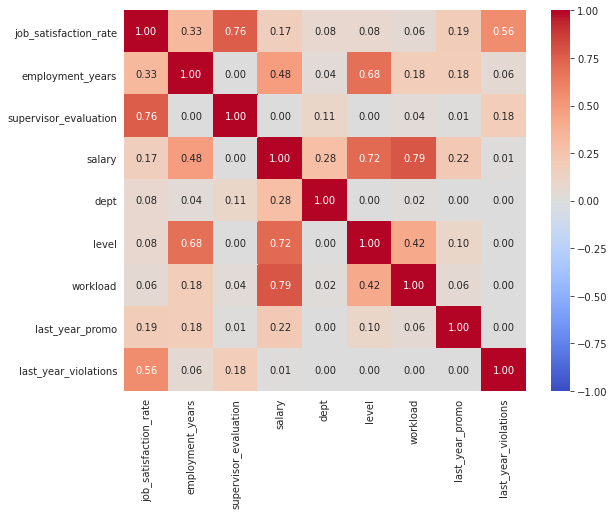

In [ ]:
corr_matrix = train_1_imputed.drop('id', axis=1).phik_matrix(interval_cols=[
    'job_satisfaction_rate',
    'salary'
])

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0
)
plt.show()

Очень сильных взаимосвязей нет.

Сильные связи между:
* `job_satisfaction_rate` и `supervisor_evaluation`;
* `salary` и `level`;
* `salary` и `workload`;
* `employment_years` и `level`.

Средние связи между:
* `job_satisfaction_rate` и `last_year_violations`.

Слабые связи между:
* `job_satisfaction_rate` и `employment_years`;
* `employment_years` и `salary`;
* `workload` и `level`.

#### 1.3.4. Мультиколлинеарность

Поскольку мы собираемся построить модель линейной регрессии, которая чувствительна к линейным зависимостям, проверим, есть ли линейные взаимосвязи между количественными признаками. Для этого воспользуемся коэффициентом Спирмана, поскольку не все признаки распределены нормально.

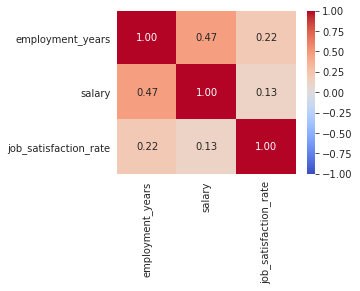

In [ ]:
corr_matrix_spearman = train_1_imputed[
    ['employment_years',
     'salary',
     'supervisor_evaluation',
     'job_satisfaction_rate']
].corr(method='spearman')

plt.figure(figsize=(4, 3))
sns.heatmap(
    corr_matrix_spearman,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0
)
plt.show()

Сильных и очень сильных линейных связей нет.

**Промежуточные выводы**

1. Исследовательский анализ показал, что:
* в данных нет аномалий, крайне мало выбросов;

* тренировочная и тестовая выборки не имеют значительных отличий;

* большинство сотрудников:
    * работает меньше 5 лет;
    * зарабатывает от 22 800 до 43 200;
    * не очень удовлетворено своей работой;
    * оценивается начальниками на 4 или 3 из 5;
    * работает в отделе продаж;
    * загружено средне;
    * не получило повышение в прошлом году;
    * не нарушало трудовой договор в прошлом году.

2. Корреляционный анализ (использовали коэффициент Фи) выявил:
* отсутствие очень сильных взаимосвязей;
* сильные связи между:
    * `job_satisfaction_rate` и `supervisor_evaluation`;
    * `salary` и `level`;
    * `salary` и `workload`;
    * `employment_years` и `level`;

* средние связи между:
    * `job_satisfaction_rate` и `last_year_violations`;

* слабые связи между:
    * `job_satisfaction_rate` и `employment_years`;
    * `employment_years` и `salary`;
    * `workload` и `level`.
3. Проверка на мультиколлинеарность показала отсутствие сильных линейных взаимосвязей между признаками.


### Шаг 1.4. Подготовка данных

Выполним кодирование и масштабирование признаков в пайплайне.

In [ ]:
ohe_columns = ['dept',
               'level',
               'workload',
               'last_year_promo',
               'last_year_violations']
ord_columns = ['supervisor_evaluation']
num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary']

ohe_pipe = Pipeline(
    [('imputer_ohe_nan', cat_imputer_nan),
     ('ohe', OneHotEncoder(
         drop='first',
         handle_unknown='ignore',
         sparse_output=False)
     )]
 )

ord_pipe = Pipeline(
    [('imputer_before_ord_nan', cat_imputer_nan),
     ('ord', OrdinalEncoder(
         categories=[[1, 2, 3, 4, 5]],
         handle_unknown='use_encoded_value',
         unknown_value=np.nan
     )),
     ('imputer_after_ord', cat_imputer_nan)
     ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

### Шаг 1.5. Обучение моделей

Соберем финальный пайплайн и пропишем словарь гиперпараметров для каждой модели:
* `LinearRegression`;
* `SVR`;
* `DecisionTreeRegressor`.


In [ ]:


pipe_final = Pipeline(
    [('preprocessor', data_preprocessor),
     ('models', LinearRegression())]
)

params = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_leaf': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [SVR()],
        'models__kernel': ['rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

Для проверки качества моделей и выбора лучшей используем симметричное среднее абсолютное процентное отклонение (SMAPE). Мы задали множество вариантов для перебора, поэтому воспользуемся `RadomizedSearchCV` для экономии ресурсов.

Создадим функцию `calculate_smape`, которая принимает на вход настоящие значения целевого признака и предсказанные моделью, а возвращает – значение метрики SMAPE. Будем считать успехом SMAPE≤15 на тестовой выборке.


In [ ]:
def calculate_smape(true, pred):
    if not all([isinstance(true, np.ndarray),
                isinstance(pred, np.ndarray)]):
        true = np.array(true)
        pred = np.array(pred)

    smape = (100/len(true)) * np.sum((2 * np.abs(true - pred)) / (np.abs(true) + np.abs(pred)))
    return smape

In [ ]:
smape_score = sklearn.metrics.make_scorer(
    calculate_smape,
    response_method='predict',
    greater_is_better=False
)

y_train_1 = train_1_imputed['job_satisfaction_rate']
X_train_1 = train_1_imputed.drop(['id', 'job_satisfaction_rate'], axis=1)

search = RandomizedSearchCV(
        pipe_final,
        params,
        cv=5,
        scoring=smape_score,
        n_iter=20,
        n_jobs=-1,
        random_state=RANDOM_STATE,
        return_train_score=True
    )
search.fit(X_train_1, y_train_1)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('imputer_ohe_nan',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'level',
                                                                                'workload',
                                                                                'last_year_promo',
                                                                                'last_year_violati...
                                         'models__min_samples_leaf': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVR()],
                                         'models__kernel': ['rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(calculate_smape, greater_is_better=False, response_method='predict'))

In [ ]:
display(pd.DataFrame(search.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__min_samples_leaf,param_models__max_depth,param_models,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027975,0.001414,0.009319,0.000246,StandardScaler(),3.0,5.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",-20.360500,...,-20.092051,0.391679,12,-19.569593,-19.787095,-19.564496,-19.172950,-19.845544,-19.587936,0.236273
1,0.025841,0.000716,0.008400,0.000235,passthrough,3.0,5.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-20.360500,...,-20.092051,0.391679,12,-19.569593,-19.787095,-19.564496,-19.172950,-19.845544,-19.587936,0.236273
2,0.026387,0.000791,0.009787,0.001310,StandardScaler(),2.0,2.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",-24.406881,...,-23.616754,0.967746,17,-23.376809,-23.375771,-23.646484,-23.582216,-24.045817,-23.605419,0.245428
3,0.026268,0.000350,0.008851,0.000367,passthrough,2.0,6.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-19.283239,...,-18.764174,0.350477,9,-17.788109,-17.845223,-17.662856,-17.533284,-17.848047,-17.735504,0.121361
4,0.028969,0.002052,0.009211,0.000197,RobustScaler(),4.0,3.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': RobustScaler(), 'models_...",-22.760626,...,-22.349959,0.842107,15,-22.107478,-22.085485,-22.091560,-22.123482,-22.664156,-22.214432,0.225250
5,0.028021,0.000471,0.009446,0.000146,StandardScaler(),2.0,7.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",-18.262910,...,-17.767433,0.462040,8,-15.768415,-16.033400,-15.991718,-15.764076,-15.899053,-15.891333,0.111016
6,0.028269,0.000860,0.008975,0.000200,MinMaxScaler(),4.0,7.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",-18.203050,...,-17.720861,0.387864,7,-15.976270,-16.177602,-16.273251,-15.860949,-16.232578,-16.104130,0.158735
7,0.026712,0.001053,0.008966,0.000510,RobustScaler(),3.0,2.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': RobustScaler(), 'models_...",-24.406881,...,-23.616754,0.967746,17,-23.376809,-23.375771,-23.646484,-23.582216,-24.045817,-23.605419,0.245428
8,0.027746,0.001003,0.009365,0.000446,StandardScaler(),2.0,5.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",-20.327858,...,-20.044050,0.402251,11,-19.564652,-19.762887,-19.551497,-19.166946,-19.827685,-19.574734,0.230789
9,0.028047,0.000349,0.008889,0.000098,passthrough,3.0,10.0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",-15.617799,...,-15.532000,0.147254,1,-12.002128,-12.121421,-11.804529,-12.313260,-12.378088,-12.123885,0.208471


In [ ]:
print('Лучшая модель и ее параметры:\n', search.best_estimator_)
print(search.best_params_)
print()
print ('Метрика SMAPE лучшей модели на кроссвалидации:', search.best_score_)

Лучшая модель и ее параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'level', 'workload',
                                                   'last_year_promo',
                                                   'last_year_violations']),
                

Проверим метрику на тестовой выборке. Для этого удостоверимся, что во всех таблицах, представляющих тестовую выборку, данные следуют одному порядку (и что в них вообще содержится информация об одних и тех же сотрудниках).

In [ ]:
test = X_test_imputed.merge(y_test_1, on='id', how='inner')
test.shape

(2000, 10)

Теперь мы можем быть уверены, что входные и целевой признаки тестовой выборки относятся к одним и тем же сотрудникам, и данные расположены в одном и том же порядке.

In [ ]:
X_test_1 = test.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test_1 = test['job_satisfaction_rate']

best_model = search.best_estimator_.named_steps['models']
best_preprocessor = search.best_estimator_.named_steps['preprocessor']

X_test_pre = best_preprocessor.transform(X_test_1)
pred = best_model.predict(X_test_pre)
print ('Метрика SMAPE лучшей модели на тестовой выборке:', calculate_smape(y_test_1, pred))

Метрика SMAPE лучшей модели на тестовой выборке: 14.92833789119821


Этот результат мы можем считать успешным. Остановимся на этой модели.

### Вывод по задаче 1

Линейная регрессия, как и ожидалось, показала худшие результаты, потому что взаимосвязи входных признаков и целевого далеки от линейных.

Лучше всего справилась модель дерева решений с максимальной глубиной 10 и минимальным количеством образцов в листе 3. Ее SMAPE на тестовой выборке 14.93.

Такие гиперпараметры указывают на высокую сложность получившегося дерева решений. Многие входные признаки оказывают на целевой признак небольшое влияние, и модели приходится учитывать их все в равной степени для более точного прогноза.

Убедимся в этом наглядно.

In [ ]:
importance = pd.DataFrame([
    best_preprocessor.get_feature_names_out(),
    best_model.feature_importances_
]).T
importance.columns=(['feature', 'importance'])
display(importance.sort_values(by='importance', ascending=False))

,feature,importance
10,ord__supervisor_evaluation,0.700466
11,num__employment_years,0.075607
13,num__salary,0.070576
9,ohe__last_year_violations_yes,0.053126
4,ohe__level_middle,0.038432
7,ohe__workload_medium,0.01158
5,ohe__level_senior,0.010862
8,ohe__last_year_promo_yes,0.010257
0,ohe__dept_marketing,0.007346
2,ohe__dept_sales,0.007242


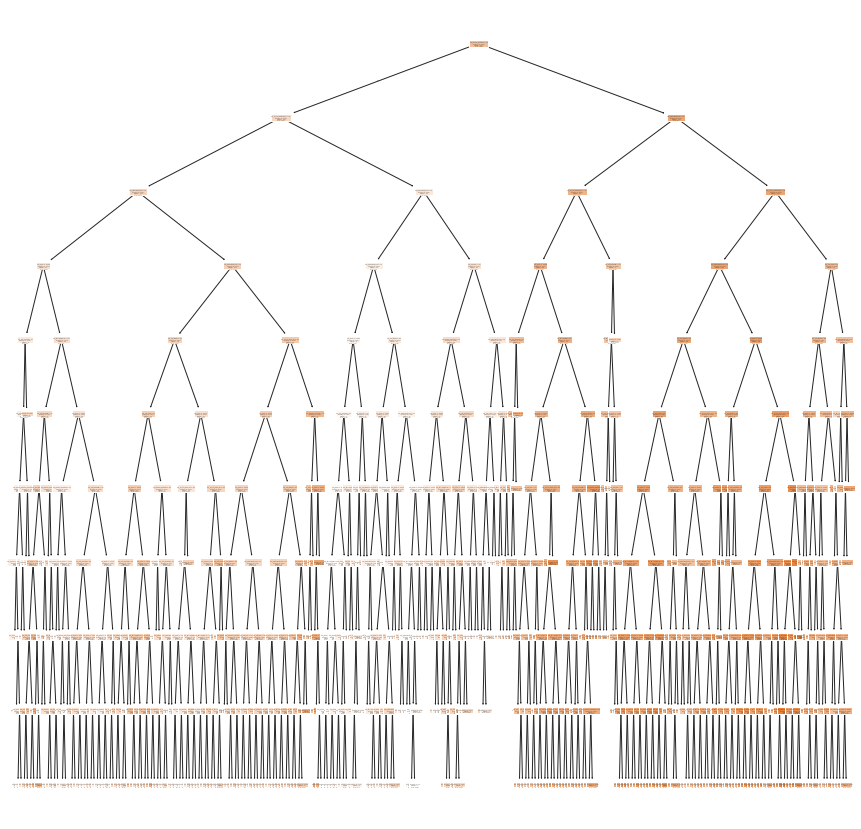

In [ ]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree=best_model,
         feature_names=best_preprocessor.get_feature_names_out(),
         filled=True)
plt.show()

Действительно, как и показал корреляционный анализ, удовлетворенность сотрудника работой сильно связана с оценкой руководителя и довольно слабо связана со всеми остальными признаками.

## Задача 2: предсказание увольнения сотрудника из компании

Это задача бинарной классификации. Для нее могут подойти, например:
* К ближайших соседей (`KNeighborsClassifier`);
* дерево решений (`DecisionTreeClassifier`);
* логистическая регрессия (`LogisticRegression`);
* метод опорных векторов (`SVC`).




### Шаг 2.1. Загрузка данных

Для этой задачи мы будем использовать те же входные признаки тестовой выборки из тех же файлов, что и для первой.

Однако тренировочная выборка и новый целевой признак (`quit`) хранятся в других файлах. Загрузим и осмотрим данные из них.

In [ ]:
try:
    train_2 = pd.read_csv('/content/drive/MyDrive/datasets/train_quit.csv')
    test_quit = pd.read_csv('/content/drive/MyDrive/datasets/test_target_quit.csv')
except:
    train_2 = pd.read_csv('/datasets/train_quit.csv')
    test_quit = pd.read_csv('/datasets/test_target_quit.csv')

print(train_2.info())
display(train_2.head())
print()

print(test_quit.info())
display(test_quit.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB
None


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


В данных нет пропусков, все типы соответствуют ожиданиям.

Проверим, совпадают ли `id` сотрудников в этой тренировочной выборке с тренировочной выборкой первой задачи.

In [ ]:
train_1['id'].sort_values==train_2['id'].sort_values

False

Не совпадают. Это значит, что нужно выполнить все этапы предобработки и анализа.

**Промежуточные выводы**

В данных нет пропусков, все типы соответствуют ожиданиям.

Тренировочные выборки в двух задачах не совпадают.

### Шаг 2.2. Предобработка данных


In [ ]:
print('Явные дубликаты:')
print(train_2['id'].duplicated().sum())

print('Проверка скрытых дубликатов')
cat_columns = train_2.select_dtypes(include='object').columns.to_list()
for col in cat_columns:
    print(train_2[col].value_counts())
    print()

print(test_quit['quit'].value_counts())

Явные дубликаты:
0
Проверка скрытых дубликатов
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

medium    2118
low       1208
high       674
Name: workload, dtype: int64

no     3887
yes     113
Name: last_year_promo, dtype: int64

no     3455
yes     545
Name: last_year_violations, dtype: int64

no     2872
yes    1128
Name: quit, dtype: int64

no     1436
yes     564
Name: quit, dtype: int64


Ни явных, ни скрытых дубликатов нет. Отсутствуют пропуски в виде пробела, с которыми мы столкнулись в первой задаче.

Возможные значения всех категориальных признаков совпадают в тренировочной и тестовой выборках (входные признаки тестовой выборки мы анализировали во время решения первой задачи).

Есть опечатки в столбце `level`. Исправим их, как и в первой задаче.

In [ ]:
cat_columns_for_input = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

train_2_imp_nan = pd.DataFrame(
    data_imputer_nan.fit_transform(train_2[num_columns_for_imput+cat_columns]),
    columns=num_columns_for_imput+cat_columns
)

train_2_imp_space = pd.DataFrame(
    cat_imputer_space.fit_transform(train_2_imp_nan),
    columns=num_columns_for_imput+cat_columns
)

train_2_imputed = pd.DataFrame(
    cat_imputer_sinior.fit_transform(train_2_imp_space),
    columns=num_columns_for_imput+cat_columns
)

train_2_imputed[['id', 'quit']] = train_2[['id', 'quit']]

train_2_imputed['id'] = train_2_imputed['id'].astype('int32')
train_2_imputed['employment_years'] = train_2_imputed['employment_years'].astype('int32')
train_2_imputed['salary'] = train_2_imputed['salary'].astype('int32')

print(train_2_imputed.info())
display(train_2_imputed.head())
print(train_2_imputed['level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employment_years       4000 non-null   int32 
 1   supervisor_evaluation  4000 non-null   object
 2   salary                 4000 non-null   int32 
 3   dept                   4000 non-null   object
 4   level                  4000 non-null   object
 5   workload               4000 non-null   object
 6   last_year_promo        4000 non-null   object
 7   last_year_violations   4000 non-null   object
 8   quit                   4000 non-null   object
 9   id                     4000 non-null   int32 
dtypes: int32(3), object(7)
memory usage: 265.8+ KB
None


,employment_years,supervisor_evaluation,salary,dept,level,workload,last_year_promo,last_year_violations,quit,id
0,2,4.0,54000,sales,middle,high,no,no,no,723290
1,2,4.0,27600,sales,junior,medium,no,no,no,814010
2,5,1.0,37200,purchasing,middle,medium,no,no,no,155091
3,2,3.0,24000,sales,junior,medium,no,yes,yes,257132
4,2,5.0,25200,marketing,junior,medium,no,no,no,910140


['middle' 'junior' 'senior']


Замены прошли корректно.

**Промежуточные выводы**

В данных не обнаружили никаких пропусков и дубликатов.

Исправили опечатки.

### Шаг 2.3. Исследовательский анализ данных

Поскольку мы уже проводили исследовательский анализ тестовой выборки, в  этот раз можно осмотреть данные более бегло и сконцентрировать внимание на тех моментах, в которых обнаружатся отличия между тестовой выборкой и новой тренировочной выборкой. Если отличий не обнаружится, будут по-прежнему верны выводы исследовательского анализа из задачи 1.



#### 2.3.1. Количественные признаки

Рассмотрим данные в столбцах:
* `employment_years`;
* `salary`.

Тренировочная выборка


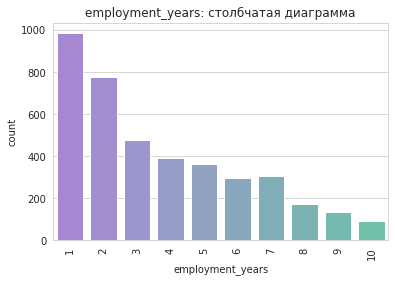

,employment_years,proportion
1,985,0.25
2,777,0.19
3,479,0.12
4,393,0.10
5,362,0.09
7,308,0.08
6,296,0.07
8,174,0.04
9,136,0.03
10,90,0.02


Тестовая выборка


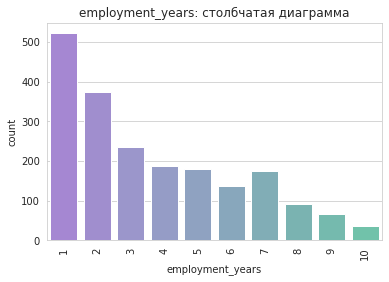

,employment_years,proportion
1,522,0.26
2,374,0.19
3,234,0.12
4,187,0.09
5,179,0.09
7,174,0.09
6,138,0.07
8,91,0.05
9,66,0.03
10,35,0.02


In [ ]:
print('Тренировочная выборка')
show_cat(train_2_imputed, 'employment_years')

print('Тестовая выборка')
show_cat(X_test_imputed, 'employment_years')

Тренировочная выборка


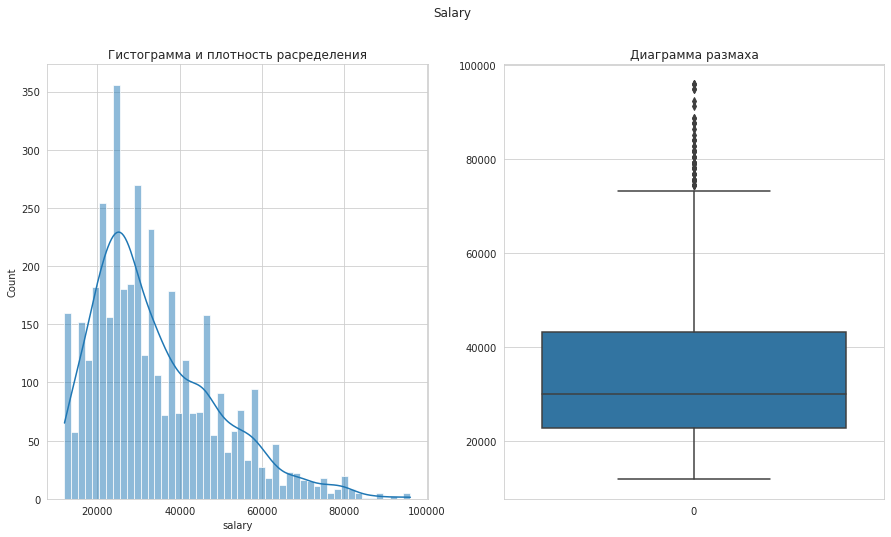

,salary
count,4000.000000
mean,33805.800000
std,15152.415163
min,12000.000000
25%,22800.000000
50%,30000.000000
75%,43200.000000
max,96000.000000


Тестовая выборка


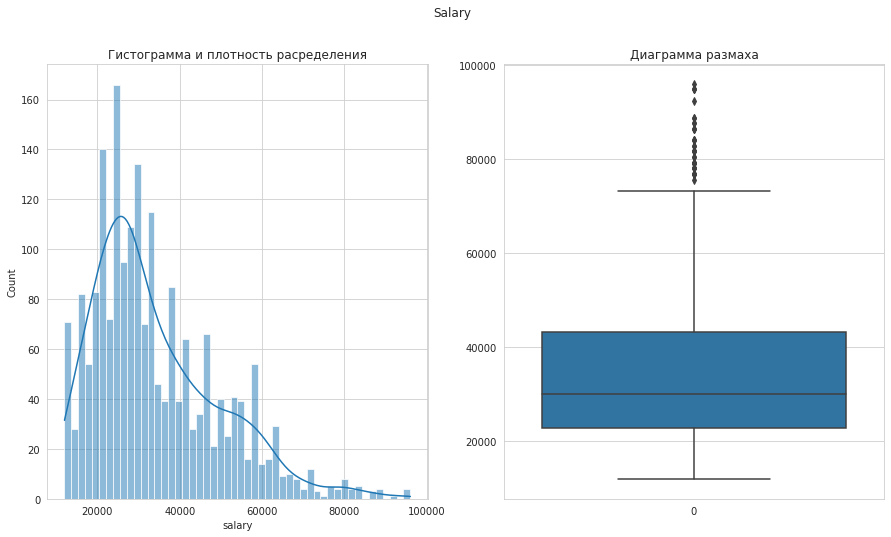

,salary
count,2000.000000
mean,34066.800000
std,15398.436729
min,12000.000000
25%,22800.000000
50%,30000.000000
75%,43200.000000
max,96000.000000


In [ ]:
print('Тренировочная выборка')
show_num(train_2_imputed, 'salary')

print('Тестовая выборка')
show_num(X_test_imputed, 'salary')

#### 2.3.2. Качественные признаки

Рассмотрим данные в столбцах:
* `dept`;
* `level`;
* `workload`;
* `last_year_promo`;
* `last_year_violations`;
* `supervisor_evaluation`;
* `quit`.

Для этого присоединим столбец `quit` к тестовой выборке.

In [ ]:
test_2 = X_test_imputed.merge(test_quit, on='id', how='inner')
test_2.shape

(2000, 10)

Тренировочная выборка


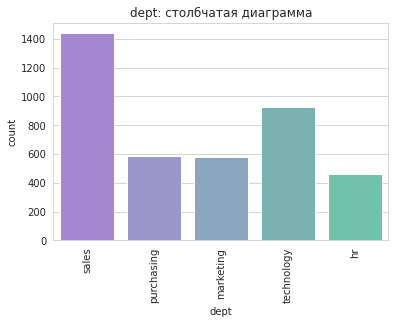

,dept,proportion
sales,1438,0.36
technology,928,0.23
purchasing,588,0.15
marketing,582,0.15
hr,464,0.12


Тестовая выборка


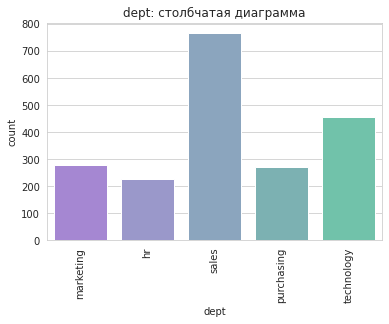

,dept,proportion
sales,766,0.38
technology,455,0.23
marketing,279,0.14
purchasing,273,0.14
hr,227,0.11


Тренировочная выборка


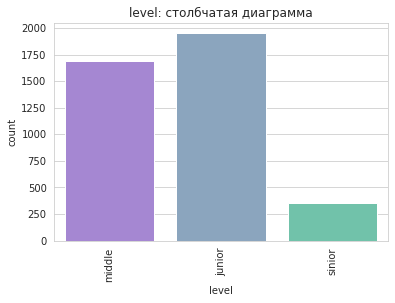

,level,proportion
junior,1949,0.49
middle,1694,0.42
sinior,357,0.09


Тестовая выборка


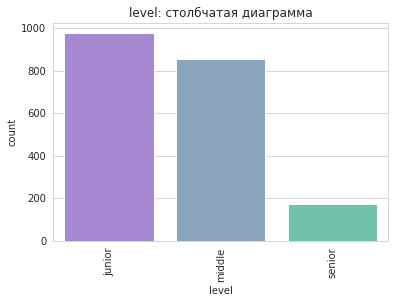

,level,proportion
junior,975,0.49
middle,854,0.43
senior,171,0.09


Тренировочная выборка


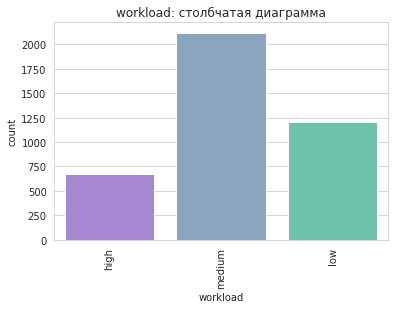

,workload,proportion
medium,2118,0.53
low,1208,0.30
high,674,0.17


Тестовая выборка


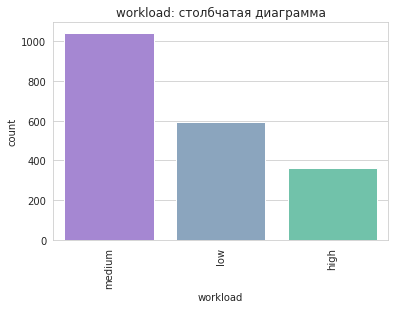

,workload,proportion
medium,1044,0.52
low,593,0.30
high,363,0.18


Тренировочная выборка


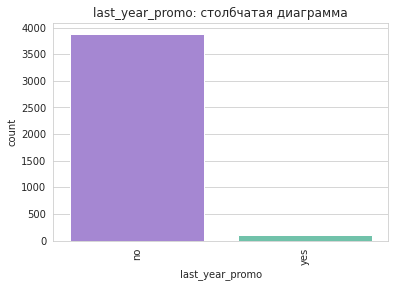

,last_year_promo,proportion
no,3887,0.97
yes,113,0.03


Тестовая выборка


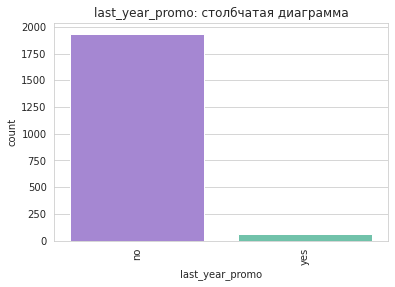

,last_year_promo,proportion
no,1937,0.97
yes,63,0.03


Тренировочная выборка


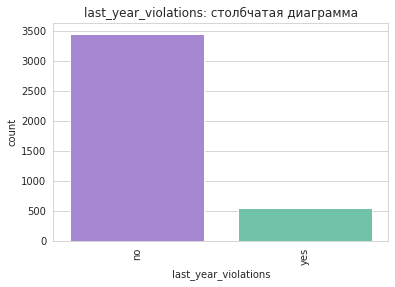

,last_year_violations,proportion
no,3455,0.86
yes,545,0.14


Тестовая выборка


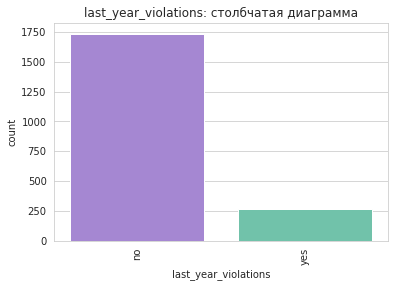

,last_year_violations,proportion
no,1738,0.87
yes,262,0.13


Тренировочная выборка


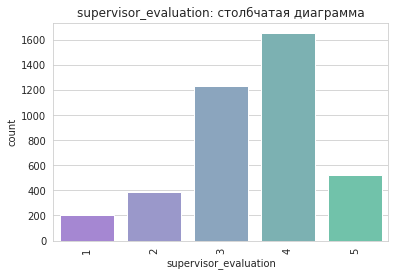

,supervisor_evaluation,proportion
4,1654,0.41
3,1233,0.31
5,520,0.13
2,391,0.10
1,202,0.05


Тестовая выборка


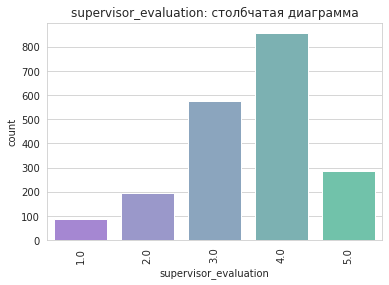

,supervisor_evaluation,proportion
4.0,857,0.43
3.0,575,0.29
5.0,284,0.14
2.0,196,0.10
1.0,88,0.04


Тренировочная выборка


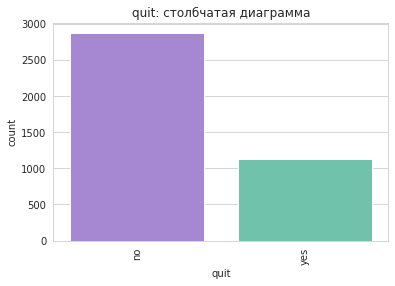

,quit,proportion
no,2872,0.72
yes,1128,0.28


Тестовая выборка


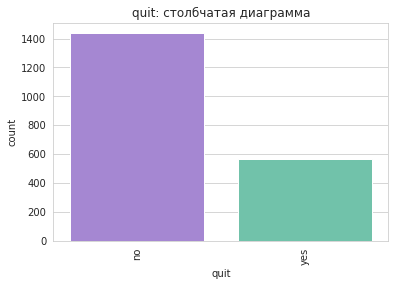

,quit,proportion
no,1436,0.72
yes,564,0.28


In [ ]:
cat_columns = ['dept',
               'level',
               'workload',
               'last_year_promo',
               'last_year_violations',
               'supervisor_evaluation',
               'quit']

for col in cat_columns:
    print('Тренировочная выборка')
    show_cat(train_2, col)

    print('Тестовая выборка')
    show_cat(test_2, col)


**Промежуточные выводы**

1. В данных нет аномалий, крайне мало выбросов.

2. Тренировочная и тестовая выборки не имеют значительных отличий.

3. Верны заключения исследовательского анализа из задачи 1, большинство сотрудников:
* работает меньше 5 лет;
* зарабатывает от 22 800 до 43 200;
* не очень удовлетворено своей работой;
* оценивается начальниками на 4 или 3 из 5;
* работает в отделе продаж;
* загружено средне;
* не получило повышение в прошлом году;
* не нарушало трудовой договор в прошлом году.

4. Количество уволившихся гораздо меньше количества оставшихся. Явный дисбаланс классов.

#### 2.3.3. Корреляционный анализ

Построим матрицу корреляции, основанную на коэффициенте Фи, чтобы еще раз убедиться в схожести выборок, а также чтобы выяснить, как новый целевой признак взаимосвязан с входными.

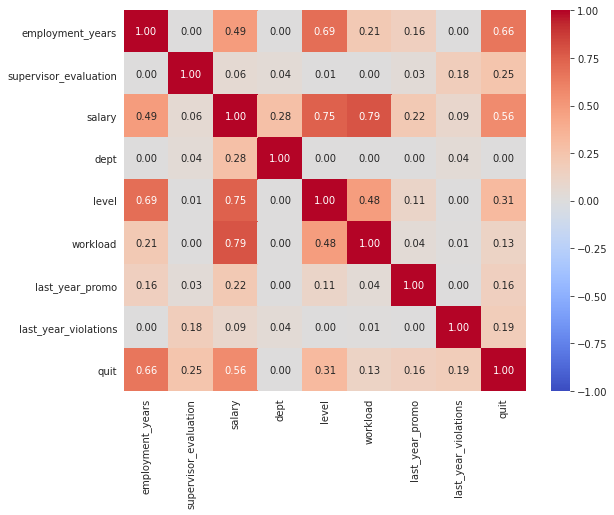

In [ ]:
corr_matrix_2 = train_2_imputed.drop('id', axis=1).phik_matrix(interval_cols=[
    'job_satisfaction_rate',
    'salary'
])

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix_2,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0
)
plt.show()

Картина взаимосвязей входных признаков между собой та же. Следовательно, мультиколлинеарность так же отсутствует.

Взаимосвязи `quit` с другими признаками:
* сильных и очень сильных связей  нет;
* средние связи с:
    * `salary`;
    * `employment_years`;
* слабая связь с `level`.

#### 2.3.4. Портрет типичного уволившегося сотрудника

Построим диаграмму рассеяния трудового стажа и зарплаты, на которой цветом выделим уволившихся сотрудников.

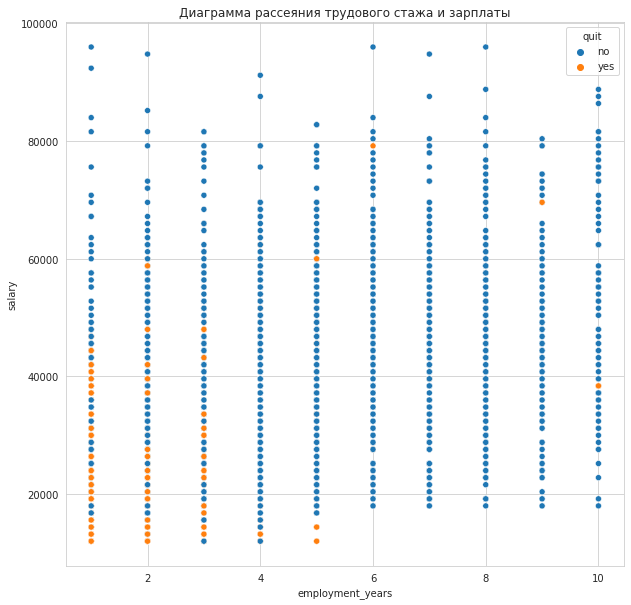

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=train_2,
    x='employment_years',
    y='salary',
    hue='quit'
)
plt.title('Диаграмма рассеяния трудового стажа и зарплаты')
plt.show()

Обычно увольняются сотрудники, проработавшие до 3 лет включительно и зарабатывавшие меньше 50 тысяч.

Для составления более детального портрета используем таблицы сопряженности и мозаичные диаграммы. Создадим функцию `show_mosaic`, которая будет принимать названия столбцов, содержащих категориальные признаки, и выводить для них таблицы сопряженности и мозаичные диаграммы.

In [ ]:
def show_mosaic(col):

    display(train_2.pivot_table(
        index=col,
        columns='quit',
        values='id',
        aggfunc='count'
    ))

    fig, dic = mosaic(
        train_2,
        ['quit', col],
        gap=0.02,
        title=f'Мозаичная диаграмма\n вертикаль: quit \n горизонталь: {col}')
    fig.set_size_inches(12, 12)

    plt.show()

quit,no,yes
dept,,
hr,348,116
marketing,419,163
purchasing,422,166
sales,1031,407
technology,652,276


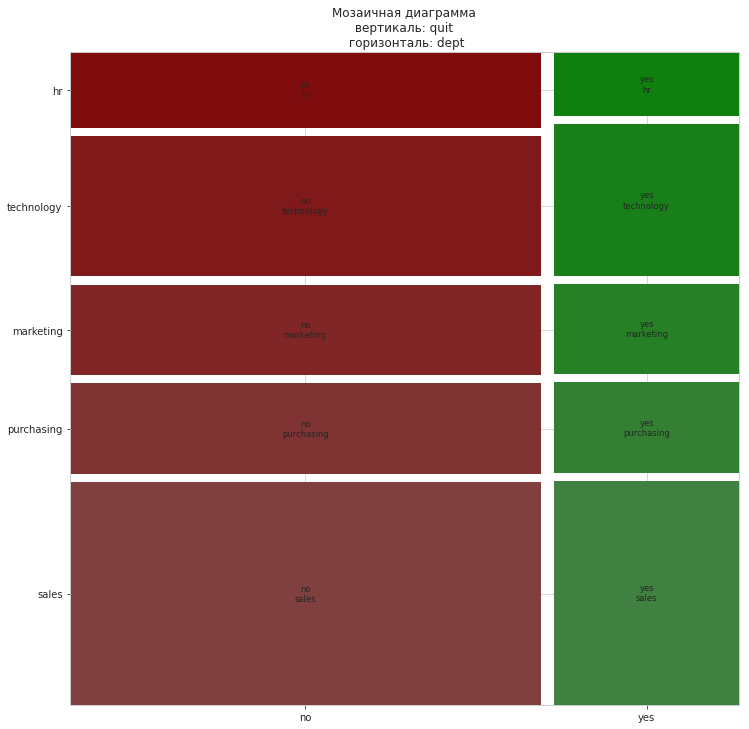

In [ ]:
show_mosaic('dept')

Уволившиеся и оставшиеся приблизительно одинаково распределены по отделам.

quit,no,yes
level,,
junior,946,1003
middle,1586,108
sinior,340,17


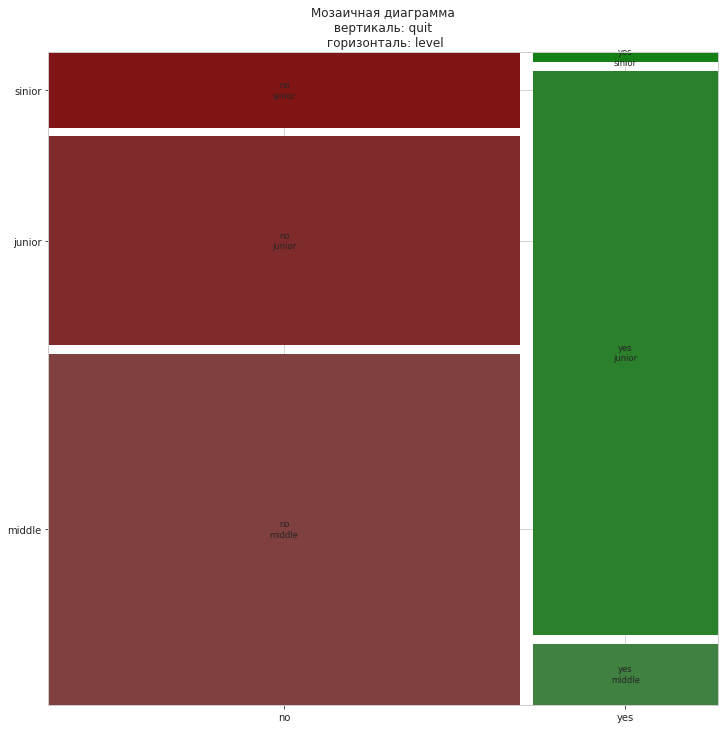

In [ ]:
show_mosaic('level')

Уволившиеся в подавляющем большинстве имеют уровень `junior`.

quit,no,yes
workload,,
high,553,121
low,689,519
medium,1630,488


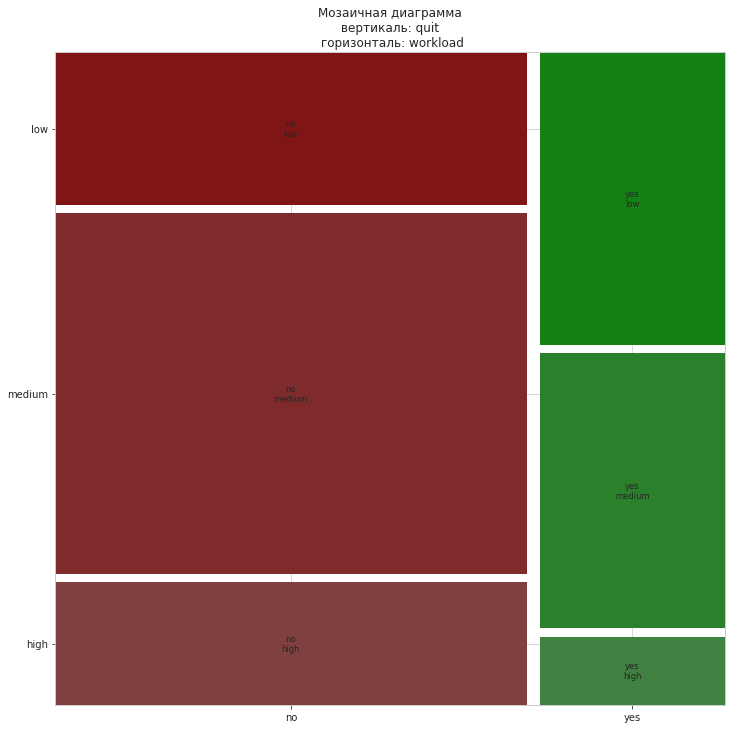

In [ ]:
show_mosaic('workload')

Уволившиеся чаще бывают мало загружены и реже бывают сильно загружены, чем оставшиеся.

quit,no,yes
last_year_promo,,
no,2760,1127
yes,112,1


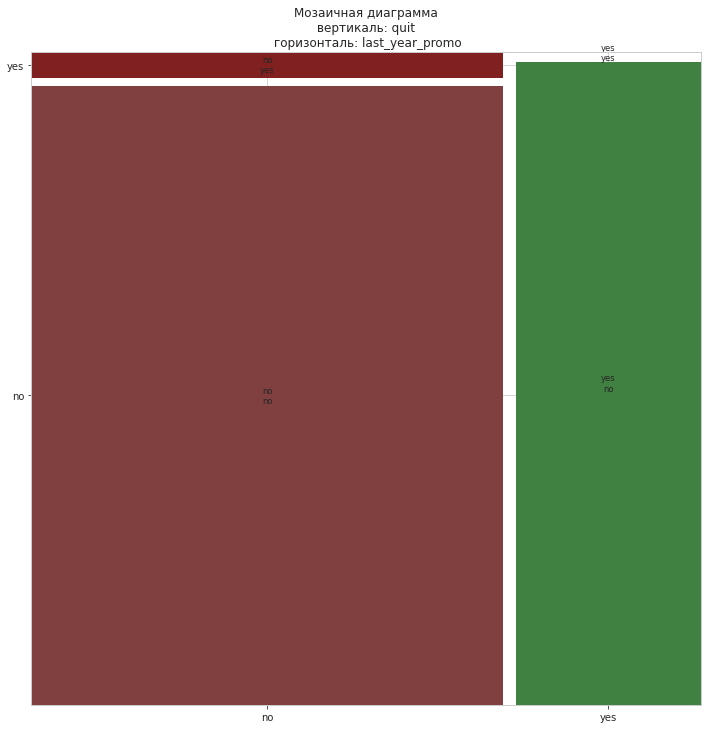

In [ ]:
show_mosaic('last_year_promo')

Никто из уволившиеся не получал повышение в прошлом году.

quit,no,yes
last_year_violations,,
no,2555,900
yes,317,228


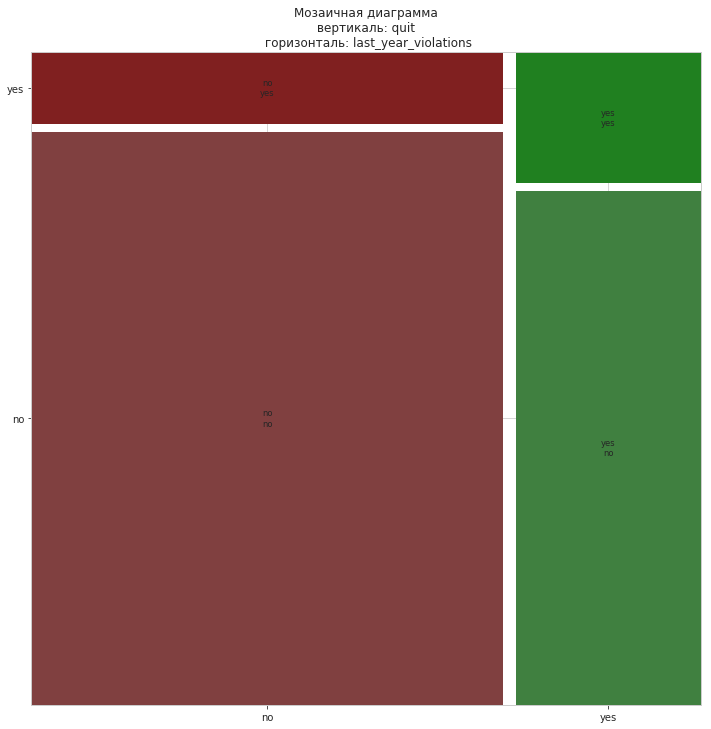

In [ ]:
show_mosaic('last_year_violations')

Уволившиеся чаще нарушали трудовой договор, чем оставшиеся.

quit,no,yes
supervisor_evaluation,,
1,107,95
2,227,164
3,710,523
4,1368,286
5,460,60


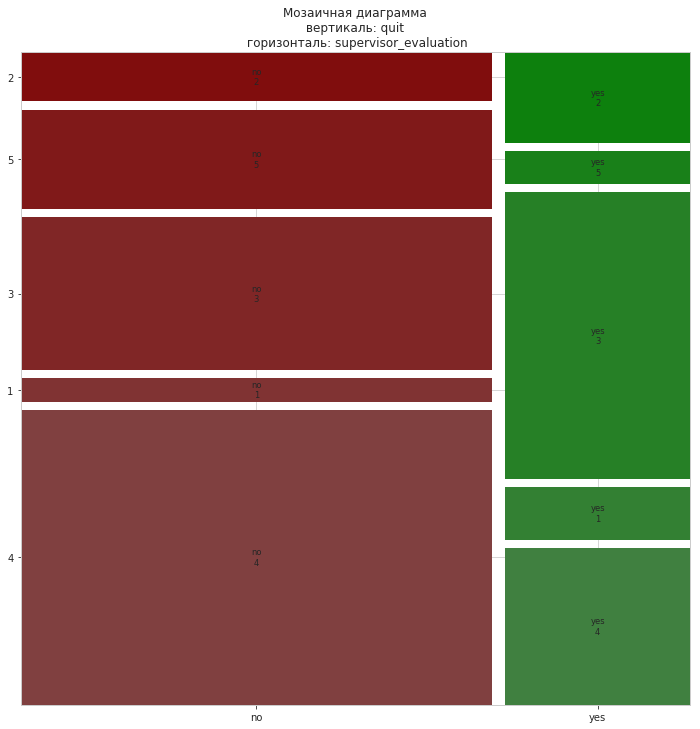

In [ ]:
show_mosaic('supervisor_evaluation')

Уволившихся в среднем не так высоко оценивают руководители, как оставшихся: меньше 4 и 5, больше 1, 2 и 3.

**Промежуточные выводы**

Типичный уволившийся сотрудник:
* мог быть из любого отдела;
* проработал до 3 лет включительно:
* зарабатывал меньше 50 тысяч;
* имел уровень `junior`;
* был слабо или средне загружен;
* не продвигался по карьерной лестнице за последний год;
* чаще среднего нарушел трудовой договор;
* невысоко оценивался руководителем.

#### 2.3.5. Проверка влияния удовлетворенности на увольнение

Проверим утверждение аналитиков о том, что уровень удовлетворенности работой в компании влияет на то, уволится ли сотрудник. Для этого визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников из тестовой выборки с помощью графика функции плотности распределения.

In [ ]:
test_2_full = test_2.merge(test[['id', 'job_satisfaction_rate']], on='id', how='inner')
test_2_full.shape

(2000, 11)

Объединение прошло корректно.

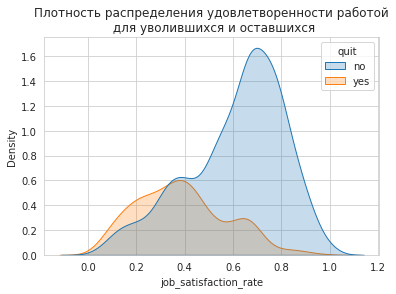

In [ ]:
sns.kdeplot(data=test_2_full, x='job_satisfaction_rate', hue='quit', fill=True)
plt.title('Плотность распределения удовлетворенности работой\n для уволившихся и оставшихся')
plt.show()

По графику видно, что более удовлетворенные сотрудники реже увольняются. Похоже, что аналитики правы.

### Шаг 2.4. Добавление нового входного признака

Поскольку `job_satisfaction_rate` и `quit` действительно оказались связаны, добавим этот признак, используя лучшую модель из задачи 1.

In [ ]:
X = train_2.drop(['id', 'quit'], axis=1)
X_pre = best_preprocessor.transform(X)
train_2['job_satisfaction_rate'] = best_model.predict(X_pre)

train_2['job_satisfaction_rate'].describe()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


count    4000.000000
mean        0.541118
std         0.213837
min         0.060000
25%         0.380000
50%         0.527500
75%         0.732500
max         0.987500
Name: job_satisfaction_rate, dtype: float64

Новый признак успешно добавлен.

### Шаг 2.5. Подготовка данных
Выполним кодирование и масштабирование признаков в пайплайне, опираясь на пайплайн предобработки из задачи 1, и
закодируем целевой признак.

In [ ]:
X_train_2 = train_2.drop(['id', 'quit'], axis=1)

num_columns_2 = ['employment_years',
               'supervisor_evaluation',
               'salary',
               'job_satisfaction_rate']

data_preprocessor_2 = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns_2)
    ],
    remainder='passthrough'
)

In [ ]:
quit_encoder = LabelEncoder()

y_train_2 = quit_encoder.fit_transform(y=train_2['quit'])
y_test_2 = quit_encoder.transform(y=test_2_full['quit'])

quit_encoder.classes_

array(['no', 'yes'], dtype=object)

### Шаг 2.6. Обучение моделей

Соберем финальный пайплайн и пропишем словарь гиперпараметров для каждой модели:
* `KNeighborsClassifier`;
* `DecisionTreeClassifier`;
* `LogisticRegression`;
* `SVC`.

In [ ]:
pipe_final_2 = Pipeline(
    [('preprocessor', data_preprocessor_2),
     ('models', KNeighborsClassifier())]
)

params_2 = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'models__min_samples_leaf': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced')],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

Мы задали множество вариантов для перебора, поэтому воспользуемся `RadomizedSearchCV` для экономии ресурсов. Для оценки качества модели используем метрику ROC-AUC. Будем считать успехом ROC-AUC ≥ 0.91 на тестовой выборке.

In [ ]:
search_2 = RandomizedSearchCV(
    pipe_final_2,
    params_2,
    cv=5,
    scoring='roc_auc',
    n_iter=30,
    n_jobs=-1,
    random_state=RANDOM_STATE
)
search_2.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n', search_2.best_estimator_)
print(search_2.best_params_)
print()
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', search_2.best_score_)

Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('imputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'level', 'workload',
                                                   'last_year_promo',
                                                   'last_year_violations']),
                

In [ ]:
pd.DataFrame(search_2.cv_results_)[[
    'param_models',
    'param_models__kernel',
    'param_models__n_neighbors',
    'param_preprocessor__num',
    'param_models__min_samples_leaf',
    'param_models__max_depth',
    'mean_test_score'
]]

,param_models,param_models__kernel,param_models__n_neighbors,param_preprocessor__num,param_models__min_samples_leaf,param_models__max_depth,mean_test_score
0,DecisionTreeClassifier(random_state=42),NaN,NaN,MinMaxScaler(),4.0,6.0,0.923736
1,DecisionTreeClassifier(random_state=42),NaN,NaN,MinMaxScaler(),3.0,4.0,0.915591
2,DecisionTreeClassifier(random_state=42),NaN,NaN,StandardScaler(),4.0,5.0,0.921922
3,DecisionTreeClassifier(random_state=42),NaN,NaN,RobustScaler(),2.0,4.0,0.914888
4,"SVC(probability=True, random_state=42)",rbf,NaN,StandardScaler(),NaN,NaN,0.928558
5,DecisionTreeClassifier(random_state=42),NaN,NaN,RobustScaler(),4.0,5.0,0.921922
6,KNeighborsClassifier(),NaN,6.0,StandardScaler(),NaN,NaN,0.920867
7,DecisionTreeClassifier(random_state=42),NaN,NaN,MinMaxScaler(),3.0,7.0,0.925259
8,DecisionTreeClassifier(random_state=42),NaN,NaN,passthrough,2.0,2.0,0.867142
9,DecisionTreeClassifier(random_state=42),NaN,NaN,StandardScaler(),2.0,6.0,0.920906


In [ ]:
X_test_2 = test_2_full.drop(['id', 'quit'], axis=1)

best_model_2 = search_2.best_estimator_.named_steps['models']
best_preprocessor_2 = search_2.best_estimator_.named_steps['preprocessor']

X_test_2_pre = best_preprocessor_2.transform(X_test_2)
pred_proba = best_model_2.predict_proba(X_test_2_pre)

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_2, pred_proba[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.9250824789110809


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Этот результат мы можем считать успешным. Остановимся на этой модели.

### Вывод по задаче 2

Многие модели показали достаточно хорошие результаты на тренировочной выборке. Хуже других справлялись дерево решений с маленькой глубиной (для него слишком много входных признаков со сложными взаимоотношениями) и модель опорных векторов с сигмоидным ядром.

Лучше всего с предсказанием увольнения справилась модель линейной регрессии со сбалансированными классами. Ее ROC-AUC на тестовой выборке 0.926. Близкие к ней результаты показали также К ближайших соседей, деревья решений с большой глубиной и опорные вектора с ядром rbf.

Способ кодирования переменных не оказал на результаты влияния, заметного визуально при изучении отчета.

## Общий вывод


**Задача 1. Предсказание уровня удовлетворенности сотрудника**
1. В данных есть очень маленькое количество случайных пропусков в столбцах `dept` и `level`. Заполнили их в пайплайне самыми частыми значениями.
2. Все типы данных соответствуют ожиданиям. Проверили наличие явных и скрытых дубликатов. Не обнаружили.
3. Исследовательский анализ показал, что:
* в данных нет аномалий, крайне мало выбросов;

* тренировочная и тестовая выборки не имеют значительных отличий;

* большинство сотрудников:
    * работает меньше 5 лет;
    * зарабатывает от 22 800 до 43 200;
    * не очень удовлетворено своей работой;
    * оценивается начальниками на 4 или 3 из 5;
    * работает в отделе продаж;
    * загружено средне;
    * не получило повышение в прошлом году;
    * не нарушало трудовой договор в прошлом году.

4. Корреляционный анализ (использовали коэффициент Фи) выявил:
* отсутствие очень сильных взаимосвязей;
* сильные связи между:
    * `job_satisfaction_rate` и `supervisor_evaluation`;
    * `salary` и `level`;
    * `salary` и `workload`;
    * `employment_years` и `level`;

* средние связи между:
    * `job_satisfaction_rate` и `last_year_violations`;

* слабые связи между:
    * `job_satisfaction_rate` и `employment_years`;
    * `employment_years` и `salary`;
    * `workload` и `level`.
5. Проверка на мультиколлинеарность показала отсутствие сильных линейных взаимосвязей между признаками.
6. Построили пайплайн для подготовки данных и обучения моделей. Выбрали лучшую модель методом `RandomSearchCV`. Для этого создали функцию, возвращающую SMAPE.
7. Линейная регрессия, как и ожидалось, показала худшие результаты, потому что взаимосвязи входных признаков и целевого далеки от линейных. Лучше всего справилась модель дерева решений с максимальной глубиной 10 и минимальным количеством образцов в листе 3. Ее SMAPE на тестовой выборке 14.93.
8. Такие гиперпараметры указывают на высокую сложность получившегося дерева решений. Многие входные признаки оказывают на целевой признак небольшое влияние, и модели приходится учитывать их все для более точного прогноза.

**Задача 2. Предсказание увольнения сотрудника**
1. В данных нет пропусков и дубликатов.
2. Все типы соответствуют ожиданиям. Тренировочные выборки в двух задачах не совпадают.
3. Исследовательский анализ показал, что:
* в данных нет аномалий, крайне мало выбросов;
* тренировочная и тестовая выборки не имеют значительных отличий;
* верны заключения исследовательского анализа из задачи 1, количество уволившихся гораздо меньше количества оставшихся.
4. Корреляционный анализ (использовали коэффициент Фи) выявил:
* картина взаимосвязей входных признаков между собой та же, мультиколлинеарность так же отсутствует;
* взаимосвязи `quit` с другими признаками:
    * сильных и очень сильных связей  нет;
    * средние связи с:
        * `salary`;
        * `employment_years`;
    * слабая связь с `level`.

5. Портрет типичного уволившиегося сотрудника:
* мог быть из любого отдела;
* проработал до 3 лет включительно:
* зарабатывал меньше 50 тысяч;
* имел уровень `junior`;
* был слабо или средне загружен;
* не продвигался по карьерной лестнице за последний год;
* чаще среднего нарушел трудовой договор;
* невысоко оценивался руководителем.
6. Проверили утверждение аналитиков о том, что уровень удовлетворенности работой в компании влияет на то, уволится ли сотрудник. Заключили, что аналитики правы.
7. При помощи модели из задачи 1 ввели новый входной признак - удовлетворенность работой.
8. Построили пайплайн для подготовки данных и обучения моделей. Выбрали лучшую модель методом `RandomSearchCV`, основываясь на метрике ROC-AUC.
9. Лучше всего с предсказанием увольнения справилась модель линейной регрессии со сбалансированными классами. Ее ROC-AUC на тестовой 0.925. Близкие к ней результаты показали также К ближайших соседей, деревья решений с большой глубиной и опорные вектора с ядром rbf. Способ кодирования переменных не оказал на результаты влияния, заметного визуально при изучении отчета. Хуже справлялись дерево решений с маленькой глубиной (для него слишком много входных признаков со сложными взаимоотношениями) и модель опорных векторов с сигмоидным ядром.

**Рекомендации:**
1. Похоже, что для повышения уровня удовлетворенности сотрудников бесполезно прибегать к повышению заработной платы (разве что в сегменте с самой низкой оплатой труда).

2. Могут быть полезны дальнейшие исследования:
* из чего складываются оценки начальников и как они влияют на отношение к сотруднику, поскольку именно оценки имеют наиболее сильную связь с уровнем удовлетворенности;
* почему наименее загруженные сотрудники уровня `junior` мало загружены (им ничего не поручают, потому что опасаются ошибок и вопросов; или они не хотят брать на себя дополнительные обязанности и ответственность; или есть другие причины).

3. Наибольшая текучка кадров заметна среди сотрудников уровня `junior`. Эта ситуация в целом не уникальна: неопытные специалисты во многих сферах более подвижны. Однако для сбережения ресурсов на поиск новых сотрудников можно предпринять следующее:
* более тщательно отбирать кандидатов, исходя из их заинтересованности в предлагаемых рабочих задачах;
* разработать или усовершенствовать систему адаптации в коллективе и обучения для сотрудников уровня `junior`.
